In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
vdd = np.arange(3,10,1)
vdd

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
data_250 = [np.genfromtxt(f'./output/250/{i}v/data.txt') for i in vdd]
data_250

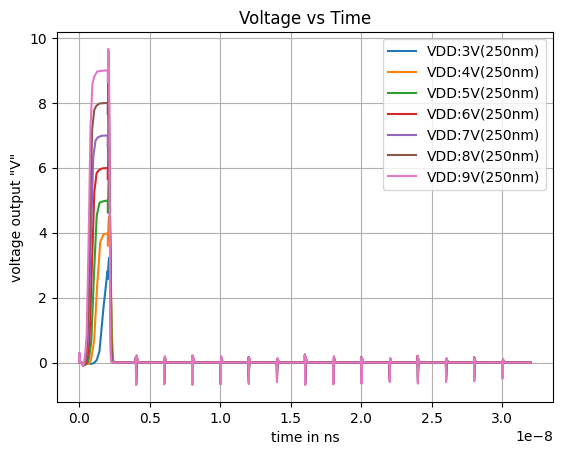

In [23]:
for i in range (len(data_250)):
    plt.plot(data_250[i][:,0], data_250[i][:,1], label=f'VDD:{vdd[i]}V(250nm)')

# add a legend
plt.legend()
plt.xlabel('time in ns')
plt.ylabel('voltage output "V"')
plt.title('Voltage vs Time')
plt.grid()
plt.show()

Delay:  [1.31989545e-09, 1.3075061e-09, 1.2765868e-09, 1.2523665e-09, 1.22949515e-09, 1.21182395e-09, 1.20228355e-09]


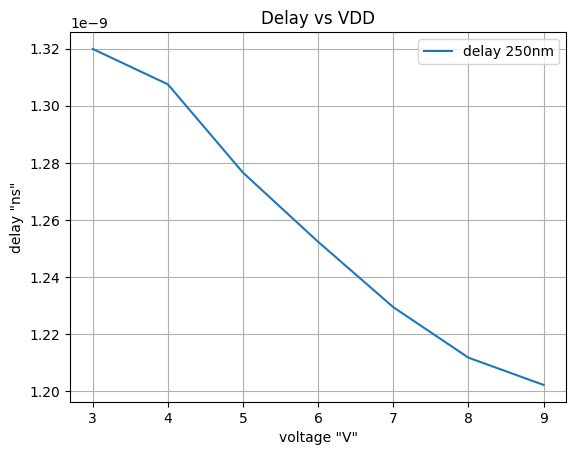

In [24]:
# plot propagation delay
tp = [d[0,11] for d in data_250]
print("Delay: ", tp)
plt.plot(vdd,tp, label='delay 250nm')
plt.legend()
plt.xlabel('voltage "V"')
plt.ylabel('delay "ns"')
plt.title('Delay vs VDD')
plt.grid()
plt.show()

Power Static:  [-6.341651e-05 -9.770913e-05 -1.667885e-04 -2.350099e-04 -3.125379e-04
 -4.099634e-04 -5.110377e-04]


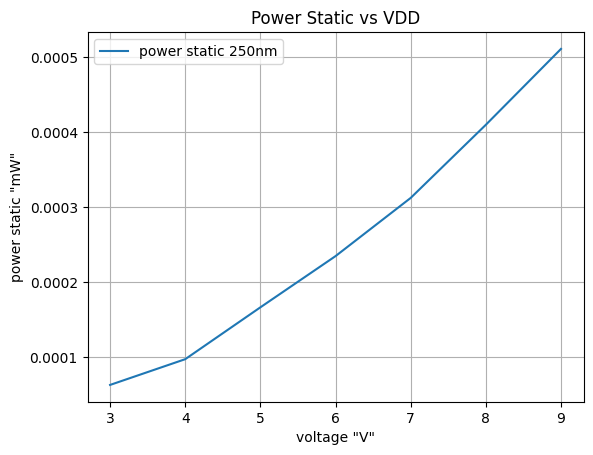

In [28]:
# plot power static
ps = np.array([d[0,13] for d in data_250])
print("Power Static: ", ps)
plt.plot(vdd,-ps, label='power static 250nm')
plt.legend()
plt.xlabel('voltage "V"')
plt.ylabel('power static "mW"')
plt.title('Power Static vs VDD')
plt.grid()
plt.show()

Power Dynamic:  [1.350e-13 2.400e-13 3.750e-13 5.400e-13 7.350e-13 9.600e-13 1.215e-12]


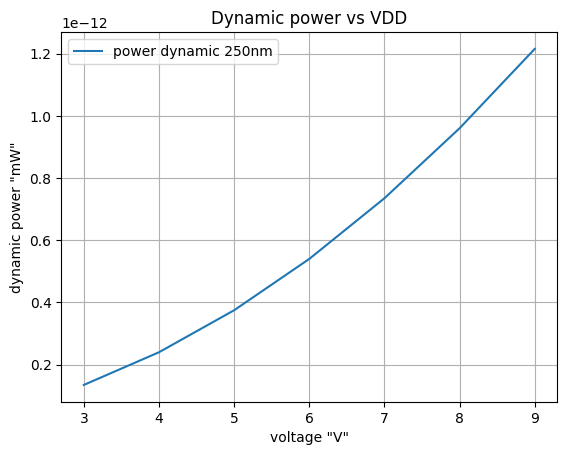

In [30]:
# plot power dynamic
pd = np.array([d[0,15] for d in data_250])
print("Power Dynamic: ", pd)
plt.plot(vdd, pd, label='power dynamic 250nm')
plt.legend()
plt.xlabel('voltage "V"')
plt.ylabel('dynamic power "mW"')
plt.title('Dynamic power vs VDD')
plt.grid()
plt.show()
